In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [3]:
df = pd.read_csv('stud_math.csv')

# Пункты 1,2,3

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
# Т.к. во всех колонках мало уникальных значений, легче их вывести сразу, чтобы было видно всю картину
for i in df.columns:
    print("\033[1m"+i+"\033[0m", df[i].unique())
    print("\033[1m"+"Уникальных Всего:",
          df[i].nunique(), df[i].count(), "\033[0m")
    print(df[i].value_counts())
    print('--------------------')

school ['GP' 'MS']
Уникальных Всего: 2 395 
GP    349
MS     46
Name: school, dtype: int64
--------------------
sex ['F' 'M']
Уникальных Всего: 2 395 
F    208
M    187
Name: sex, dtype: int64
--------------------
age [18 17 15 16 19 22 20 21]
Уникальных Всего: 8 395 
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
--------------------
address ['U' nan 'R']
Уникальных Всего: 2 378 
U    295
R     83
Name: address, dtype: int64
--------------------
famsize [nan 'GT3' 'LE3']
Уникальных Всего: 2 368 
GT3    261
LE3    107
Name: famsize, dtype: int64
--------------------
Pstatus ['A' nan 'T']
Уникальных Всего: 2 350 
T    314
A     36
Name: Pstatus, dtype: int64
--------------------
Medu [ 4.  1.  3.  2. nan  0.]
Уникальных Всего: 5 392 
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
--------------------
Fedu [ 4.  1.  2.  3. 40. nan  0.]
Уникальных Всего: 6 371 
2.0     106
3.0      96
4.0      88
1.0

In [5]:
# Начнём с конца: в "Score" есть значения Nan. Их нужно убрать и вывести колонки заново
df.dropna(subset=['score'], inplace=True)

In [6]:
# Но перед тем, как заняться преобразованием колонок, избавимся от выбросов
for i in df.columns:
    print("\033[1m"+i+"\033[0m", df[i].unique())
    print("\033[1m"+"Уникальных Всего:",
          df[i].nunique(), df[i].count(), "\033[0m")
    # Ниже добавил sort_index(), чтобы на глаз определить выбросы
    print(df[i].value_counts().sort_index())
    print('--------------------')

school ['GP' 'MS']
Уникальных Всего: 2 389 
GP    344
MS     45
Name: school, dtype: int64
--------------------
sex ['F' 'M']
Уникальных Всего: 2 389 
F    204
M    185
Name: sex, dtype: int64
--------------------
age [18 17 15 16 19 22 20 21]
Уникальных Всего: 8 389 
15     82
16    103
17     98
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64
--------------------
address ['U' nan 'R']
Уникальных Всего: 2 374 
R     83
U    291
Name: address, dtype: int64
--------------------
famsize [nan 'GT3' 'LE3']
Уникальных Всего: 2 362 
GT3    255
LE3    107
Name: famsize, dtype: int64
--------------------
Pstatus ['A' nan 'T']
Уникальных Всего: 2 344 
A     36
T    308
Name: Pstatus, dtype: int64
--------------------
Medu [ 4.  1.  3.  2. nan  0.]
Уникальных Всего: 5 386 
0.0      3
1.0     56
2.0    100
3.0     96
4.0    131
Name: Medu, dtype: int64
--------------------
Fedu [ 4.  1.  2.  3. 40. nan  0.]
Уникальных Всего: 6 365 
0.0       2
1.0      75
2.0     105
3.0

Невооружённым взглядом видно выбросы. Это: Fedu(40),famrel(-1),absences(212,385)

In [7]:
df[df['Fedu'] == 40]
# Это явно опечатка, тут должно быть 4
df.at[11, 'Fedu'] = 4

In [8]:
df[df['famrel'] == -1]
# Вместо -1 сделаем 1
df.at[25, 'famrel'] = 1

In [9]:
df[df['absences'] == 212]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [10]:
df[df['absences'] == 385]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0


In [11]:
# Заменим выбросы значением 30:
# mean_absences=round(df[df['absences']<100]['absences'].mean(),2)
df.at[390, 'absences'] = 30
df.at[222, 'absences'] = 30

count    378.000000
mean       5.899471
std        8.301382
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

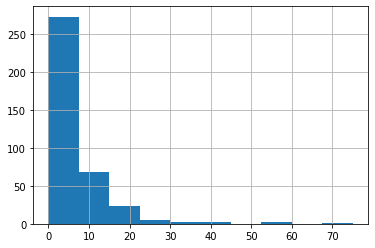

In [12]:
# Единственный столбец (не считая score), где много уникальных значений, и для которого актуальна гистограмма - "absences":
df['absences'].hist()
df['absences'].describe()

In [13]:
# Значения выше 20-ти будем считать завышенными, поэтому всё, что больше 20-ти приравняем к 20-ти
df['absences'] = df['absences'].apply(lambda x: x if x <= 20 else 20)
# df[df['absences']>=30]=round(df['absences'].mean(),2)

In [14]:
round(df['absences'].mean(), 2)

5.72

In [15]:
# Т.к. во всех колонках мало уникальных значений, легче их вывести сразу, чтобы сразу было видно всю картину
for i in df.columns:
    print("\033[1m"+i+"\033[0m", df[i].unique())
    print("\033[1m"+"Уникальных Всего:",
          df[i].nunique(), df[i].count(), "\033[0m")
    print(df[i].value_counts().sort_index())
    print('--------------------')

school ['GP' 'MS']
Уникальных Всего: 2 389 
GP    344
MS     45
Name: school, dtype: int64
--------------------
sex ['F' 'M']
Уникальных Всего: 2 389 
F    204
M    185
Name: sex, dtype: int64
--------------------
age [18 17 15 16 19 22 20 21]
Уникальных Всего: 8 389 
15     82
16    103
17     98
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64
--------------------
address ['U' nan 'R']
Уникальных Всего: 2 374 
R     83
U    291
Name: address, dtype: int64
--------------------
famsize [nan 'GT3' 'LE3']
Уникальных Всего: 2 362 
GT3    255
LE3    107
Name: famsize, dtype: int64
--------------------
Pstatus ['A' nan 'T']
Уникальных Всего: 2 344 
A     36
T    308
Name: Pstatus, dtype: int64
--------------------
Medu [ 4.  1.  3.  2. nan  0.]
Уникальных Всего: 5 386 
0.0      3
1.0     56
2.0    100
3.0     96
4.0    131
Name: Medu, dtype: int64
--------------------
Fedu [ 4.  1.  2.  3. nan  0.]
Уникальных Всего: 5 365 
0.0      2
1.0     75
2.0    105
3.0     94

Исходя из описания полей, какие действия будем делать с каждым из полей:
<br> **school:** >> Все поля заполнены, есть 2 значения
<br> **sex:** Оставляем
<br> **age:** Оставляем
<br> **address:** Что-то нужно сделать с nan
<br> **famsize:** Что-то нужно сделать с nan
<br> **Pstatus:** Что-то нужно сделать с nan
<br> **Medu:** Нужно заполнить nan средним значением
<br> **Fedu:** Нужно заполнить nan средним значением
<br> **Mjob:** Нужно заполнить nan значением "other"
<br> **Fjob:** Нужно заполнить nan значением "other"
<br> **reason:** Нужно заполнить nan значением "other"
<br> **guardian:** Нужно заполнить nan значением "other"
<br> **traveltime:** Нужно заполнить nan средним значением
<br> **studytime:** Нужно заполнить nan средним значением
<br> **failures:** Нужно заполнить nan средним значением
<br> **schoolsup:** Что-то нужно сделать с nan
<br> **famsup:** Что-то нужно сделать с nan
<br> **paid:** Что-то нужно сделать с nan
<br> **activities:** Что-то нужно сделать с nan
<br> **nursery:** Что-то нужно сделать с nan
<br> **studytime, granular:** Нужно заполнить nan средним значением
<br> **higher:** Что-то нужно сделать с nan
<br> **internet:** Что-то нужно сделать с nan
<br> **romantic:** Что-то нужно сделать с nan
<br> **famrel:** Нужно заполнить nan средним значением
<br> **freetime:** Нужно заполнить nan средним значением
<br> **goout:** Нужно заполнить nan средним значением
<br> **health:** Нужно заполнить nan средним значением
<br> **absences:** Нужно заполнить nan средним значением

<br>Можно подытожить, что есть только 3 типа действий для nan:
<br>1) Заполнить "other"
<br>2) Заполнить средним
<br>3) Столбцы, в которых только 2 значения и присутствует Nan


# Пункт 4

In [16]:
# 1) Заполнить nan "other"
df['Mjob'].fillna('other', inplace=True)
df['Fjob'].fillna('other', inplace=True)
df['reason'].fillna('other', inplace=True)
df['guardian'].fillna('other', inplace=True)

In [17]:
# 2) Заполнить nan средним
df['Medu'].fillna(round(df['Medu'].mean(), 2), inplace=True)
df['Fedu'].fillna(round(df['Fedu'].mean(), 2), inplace=True)
df['traveltime'].fillna(round(df['traveltime'].mean(), 2), inplace=True)
df['studytime'].fillna(round(df['studytime'].mean(), 2), inplace=True)
df['failures'].fillna(round(df['failures'].mean(), 2), inplace=True)
df['studytime, granular'].fillna(
    round(df['studytime, granular'].mean()), inplace=True)
df['famrel'].fillna(round(df['famrel'].mean(), 2), inplace=True)
df['freetime'].fillna(round(df['freetime'].mean(), 2), inplace=True)
df['goout'].fillna(round(df['goout'].mean(), 2), inplace=True)
df['health'].fillna(round(df['health'].mean(), 2), inplace=True)
df['absences'].fillna(round(df['absences'].mean(), 2), inplace=True)

In [18]:
# 3) Спорный пункт, но всё-таки решил nan заполнить наиболее часто встречающимися значениями
df['address'].fillna(df['address'].value_counts().idxmax(), inplace=True)
df['famsize'].fillna(df['famsize'].value_counts().idxmax(), inplace=True)
df['Pstatus'].fillna(df['Pstatus'].value_counts().idxmax(), inplace=True)
df['schoolsup'].fillna(df['schoolsup'].value_counts().idxmax(), inplace=True)
df['famsup'].fillna(df['famsup'].value_counts().idxmax(), inplace=True)
df['paid'].fillna(df['paid'].value_counts().idxmax(), inplace=True)
df['activities'].fillna(df['activities'].value_counts().idxmax(), inplace=True)
df['nursery'].fillna(df['nursery'].value_counts().idxmax(), inplace=True)
df['higher'].fillna(df['higher'].value_counts().idxmax(), inplace=True)
df['internet'].fillna(df['internet'].value_counts().idxmax(), inplace=True)
df['romantic'].fillna(df['romantic'].value_counts().idxmax(), inplace=True)

В результате получился датасет со всеми заполнеными полями, но в дальнейшем мы оставим самые полезные

# Пункты 5,6

In [20]:
# Корреляция

cm = sns.light_palette("green", as_cmap=True)
corr = df.corr()
corr.style.background_gradient(cmap=cm)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1,-0.146421,-0.148136,0.0707099,-0.018089,0.199087,0.0180193,0.0566977,0.0157989,0.120946,-0.0671826,0.180765,-0.155726
Medu,-0.146421,1,0.601175,-0.159084,0.080205,-0.234379,-0.0802451,-0.00356355,0.0375654,0.0712736,-0.0470354,0.0699778,0.211617
Fedu,-0.148136,0.601175,1,-0.125692,0.0165687,-0.259727,-0.0166502,-0.0160166,-0.016728,0.0484874,0.017286,0.0474511,0.125495
traveltime,0.0707099,-0.159084,-0.125692,1,-0.101721,0.0454877,0.101607,-0.0297887,-0.0246587,0.0318224,-0.0113464,-0.0572014,-0.0666349
studytime,-0.018089,0.080205,0.0165687,-0.101721,1,-0.174176,-0.99998,0.0383643,-0.121459,-0.0529723,-0.0766861,-0.0864814,0.114855
failures,0.199087,-0.234379,-0.259727,0.0454877,-0.174176,1,0.174353,-0.0198384,0.087842,0.103366,0.0830785,0.098694,-0.33359
"studytime, granular",0.0180193,-0.0802451,-0.0166502,0.101607,-0.99998,0.174353,1,-0.0381613,0.121664,0.0531203,0.0765798,0.0870697,-0.114295
famrel,0.0566977,-0.00356355,-0.0160166,-0.0297887,0.0383643,-0.0198384,-0.0381613,1,0.165453,0.0688381,0.0843882,-0.0967184,0.0531119
freetime,0.0157989,0.0375654,-0.016728,-0.0246587,-0.121459,0.087842,0.121664,0.165453,1,0.291048,0.0619697,0.018066,0.0187426
goout,0.120946,0.0712736,0.0484874,0.0318224,-0.0529723,0.103366,0.0531203,0.0688381,0.291048,1,-0.0173645,0.107352,-0.128261


In [21]:
# Видно, что коррелируют между собой только traveltime и "studytime, granular", поэтому "studytime, granular" можно дропнуть
df.drop(columns='studytime, granular', inplace=True)
# Также между собой хорошо коррелируют Medu и Fedu, но их оставим
# возьмём топ-5 коррелирующих столбцов:
cols = ['score', 'age', 'Medu', 'Fedu', 'studytime', 'failures']

# Пункт 7 

In [22]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

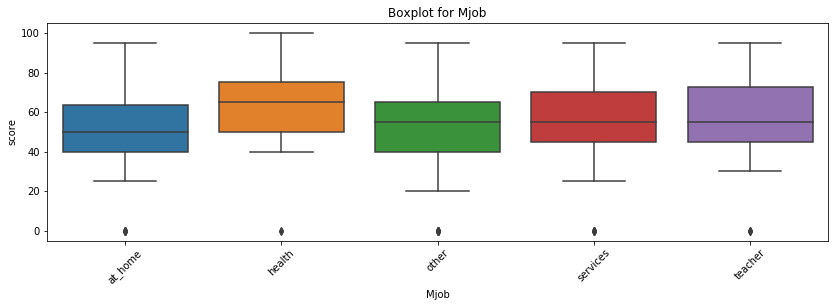

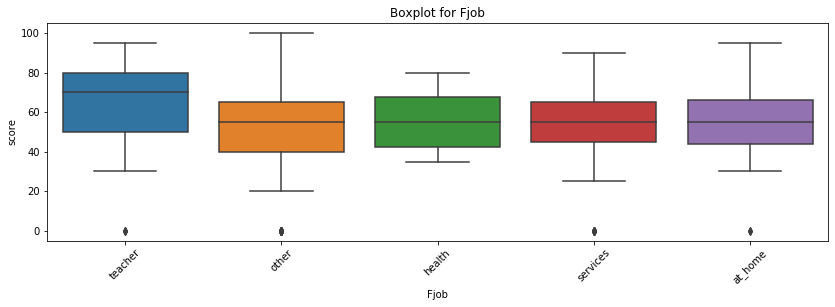

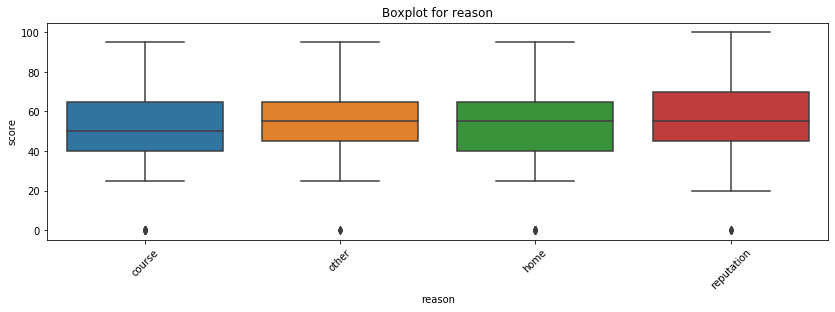

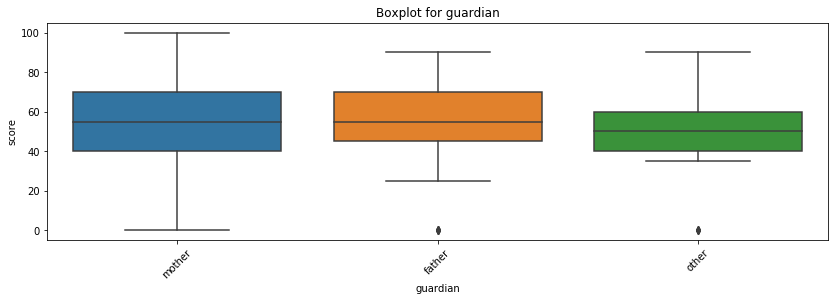

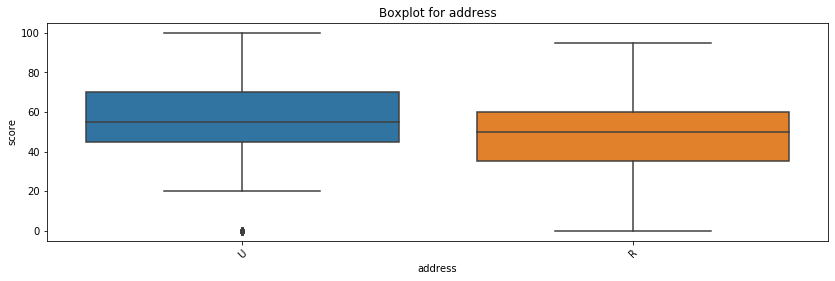

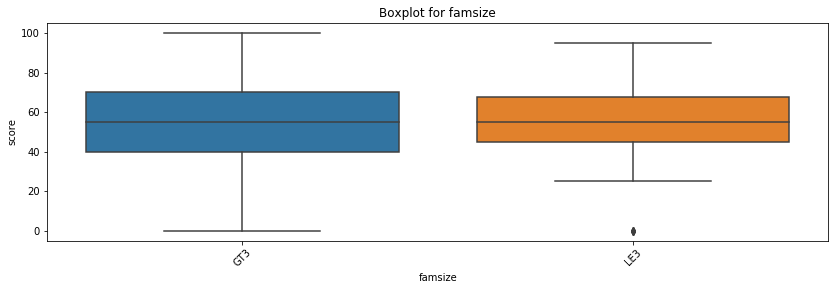

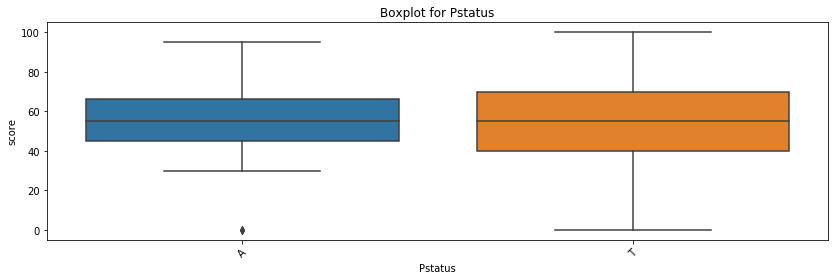

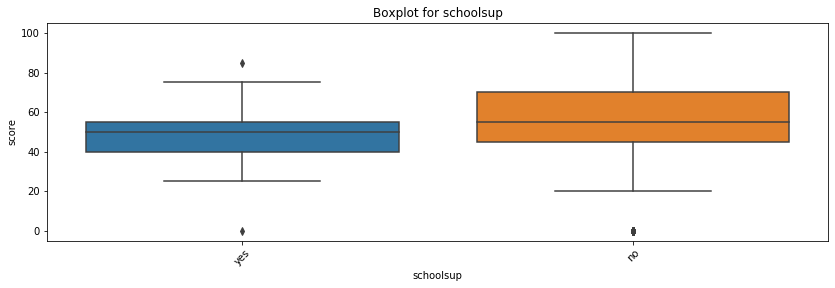

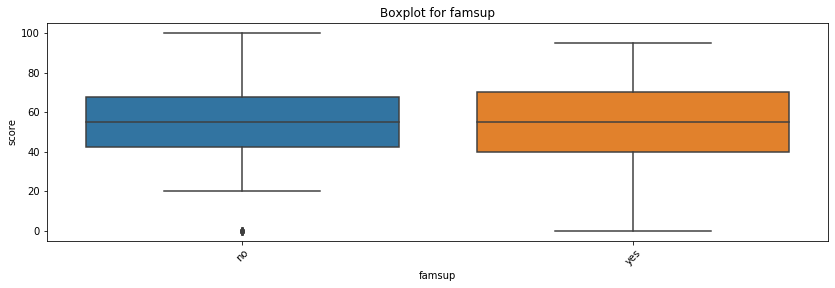

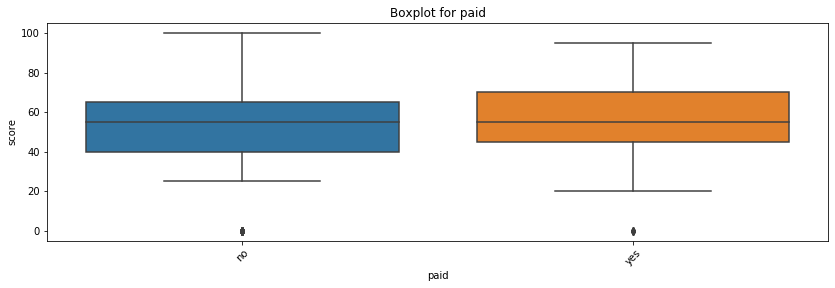

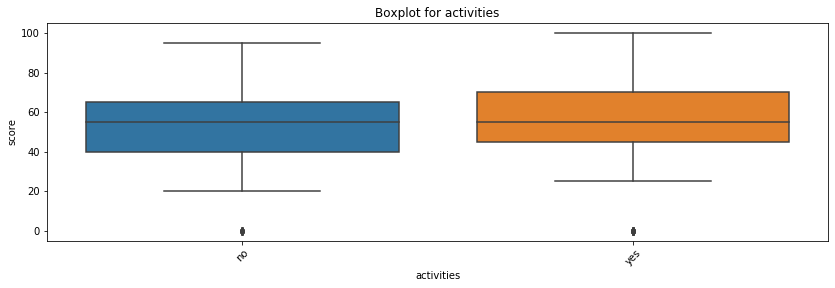

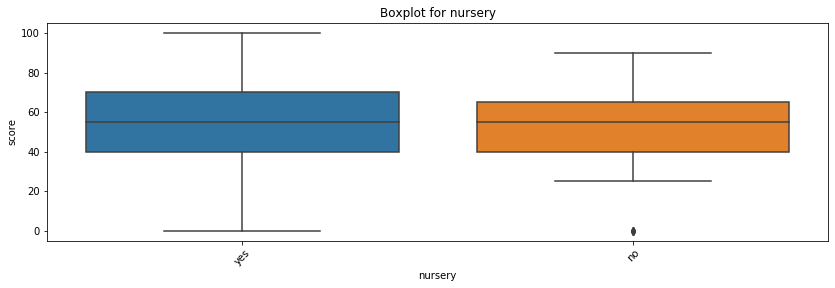

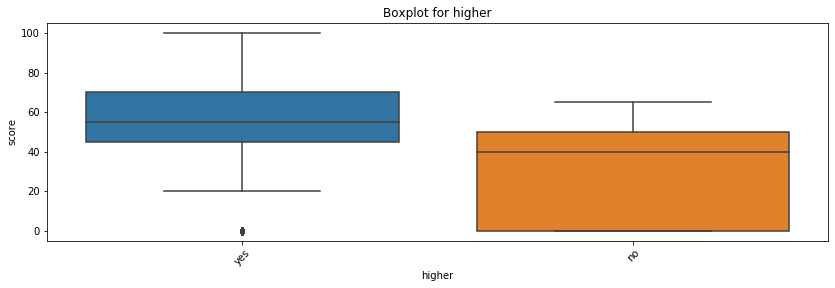

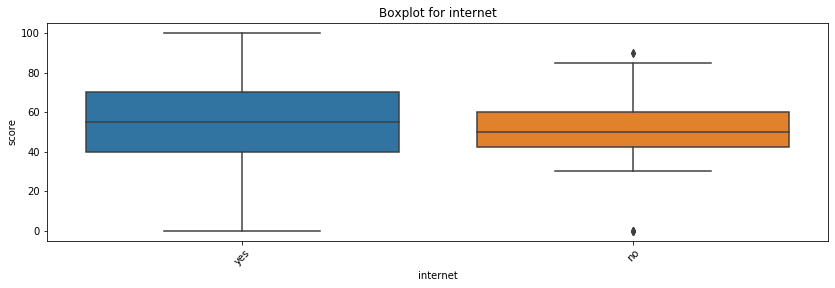

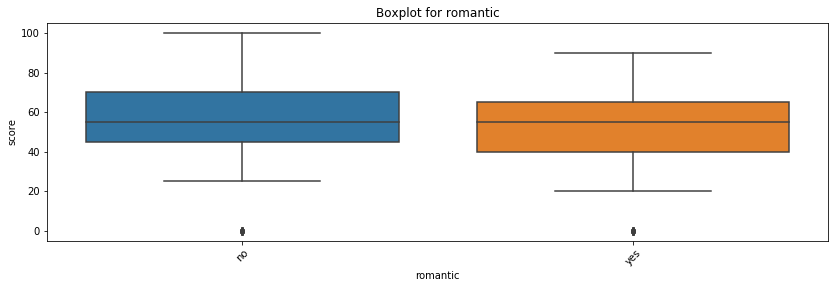

In [23]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian', 'address', 'famsize', 'Pstatus',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [24]:
# Тут добавятся следующие поля:
cols = cols+['Mjob', 'Fjob', 'address', 'schoolsup', 'higher']
cols

['score',
 'age',
 'Medu',
 'Fedu',
 'studytime',
 'failures',
 'Mjob',
 'Fjob',
 'address',
 'schoolsup',
 'higher']

In [25]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [26]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian', 'address', 'famsize', 'Pstatus',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [27]:
# Тут добавится ещё 1 поле:
cols = cols+['romantic']

In [28]:
df[cols]

,score,age,Medu,Fedu,studytime,failures,Mjob,Fjob,address,schoolsup,higher,romantic
0,30.0,18,4.0,4.0,2.0,0.0,at_home,teacher,U,yes,yes,no
1,30.0,17,1.0,1.0,2.0,0.0,at_home,other,U,no,yes,no
2,50.0,15,1.0,1.0,2.0,3.0,at_home,other,U,yes,yes,no
3,75.0,15,4.0,2.0,3.0,0.0,health,other,U,no,yes,yes
4,50.0,16,3.0,3.0,2.0,0.0,other,other,U,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
390,45.0,20,2.0,2.0,2.0,2.0,services,services,U,no,yes,no
391,80.0,17,3.0,1.0,1.0,0.0,services,services,U,no,yes,no
392,35.0,21,1.0,1.0,1.0,3.0,other,other,R,no,yes,no
393,50.0,18,3.0,2.0,1.0,0.0,services,other,R,no,yes,no


## Снова пункты 1-7, но только для выбранных столбцов

In [29]:
df = pd.read_csv('stud_math.csv')
df.dropna(subset=['score'], inplace=True)

In [30]:
cols

['score',
 'age',
 'Medu',
 'Fedu',
 'studytime',
 'failures',
 'Mjob',
 'Fjob',
 'address',
 'schoolsup',
 'higher',
 'romantic']

In [31]:
df = df[cols]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 12 columns):
score        389 non-null float64
age          389 non-null int64
Medu         386 non-null float64
Fedu         365 non-null float64
studytime    382 non-null float64
failures     367 non-null float64
Mjob         370 non-null object
Fjob         353 non-null object
address      374 non-null object
schoolsup    380 non-null object
higher       369 non-null object
romantic     358 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 39.5+ KB


In [33]:
df.at[11, 'Fedu'] = 4  # Выброс

In [34]:
# 1) Заполнить nan "other"
df['Mjob'].fillna('other', inplace=True)
df['Fjob'].fillna('other', inplace=True)
# 2) Заполнить nan средним
df['Medu'].fillna(round(df['Medu'].mean(), 2), inplace=True)
df['Fedu'].fillna(round(df['Fedu'].mean(), 2), inplace=True)
df['studytime'].fillna(round(df['studytime'].mean(), 2), inplace=True)
df['failures'].fillna(round(df['failures'].mean(), 2), inplace=True)
# 3) Т.к. не знаю, по каким критериям заполнять Nan по остальным столбцам, решил просто дропнуть пустые строки
df = df.dropna()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 393
Data columns (total 12 columns):
score        320 non-null float64
age          320 non-null int64
Medu         320 non-null float64
Fedu         320 non-null float64
studytime    320 non-null float64
failures     320 non-null float64
Mjob         320 non-null object
Fjob         320 non-null object
address      320 non-null object
schoolsup    320 non-null object
higher       320 non-null object
romantic     320 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 32.5+ KB


## Проверка

In [36]:
corr = df.corr()
corr.style.background_gradient(cmap=cm)

,score,age,Medu,Fedu,studytime,failures
score,1,-0.179046,0.213106,0.150779,0.11631,-0.373514
age,-0.179046,1,-0.164857,-0.183318,-0.0579164,0.196094
Medu,0.213106,-0.164857,1,0.633085,0.0769029,-0.236657
Fedu,0.150779,-0.183318,0.633085,1,0.0349618,-0.243317
studytime,0.11631,-0.0579164,0.0769029,0.0349618,1,-0.168999
failures,-0.373514,0.196094,-0.236657,-0.243317,-0.168999,1


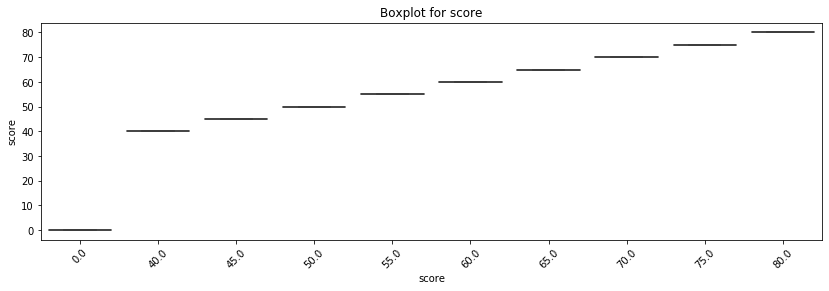

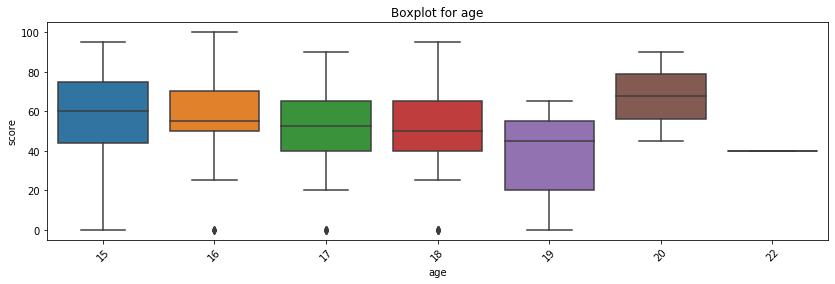

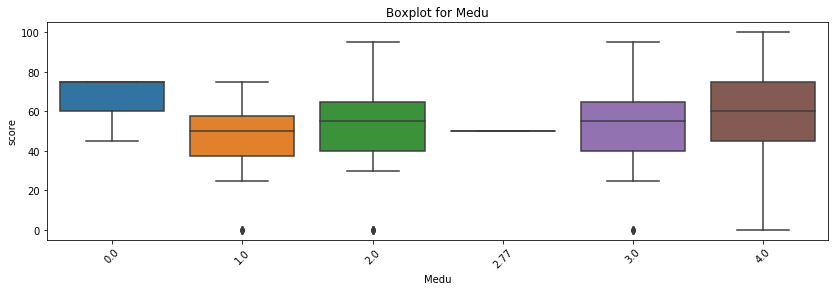

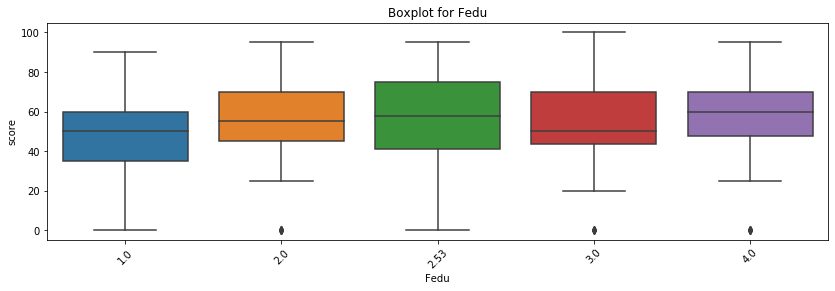

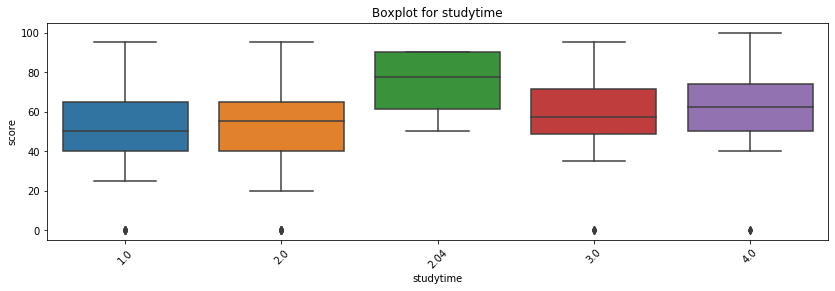

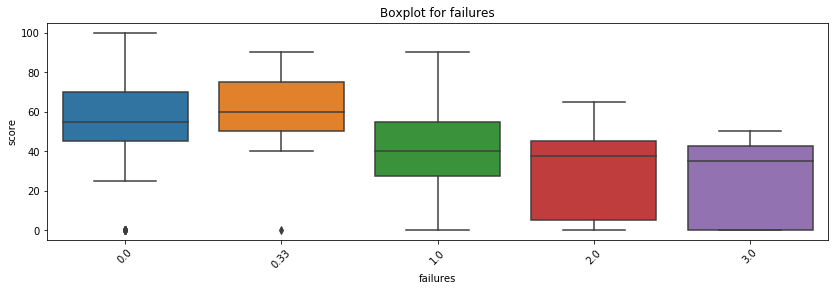

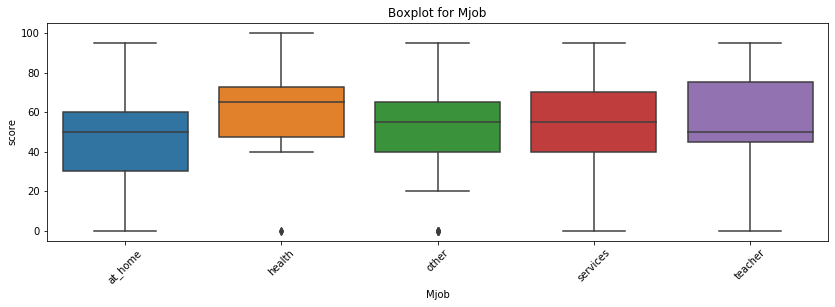

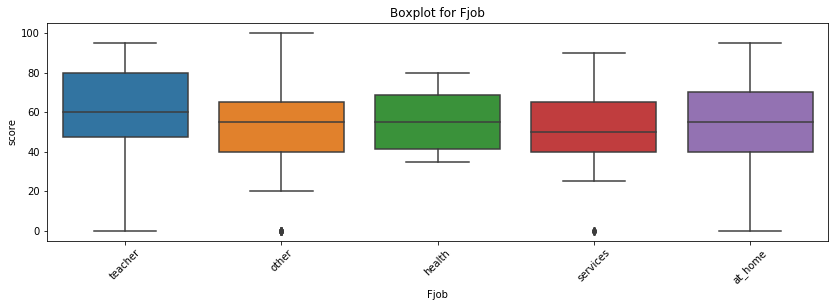

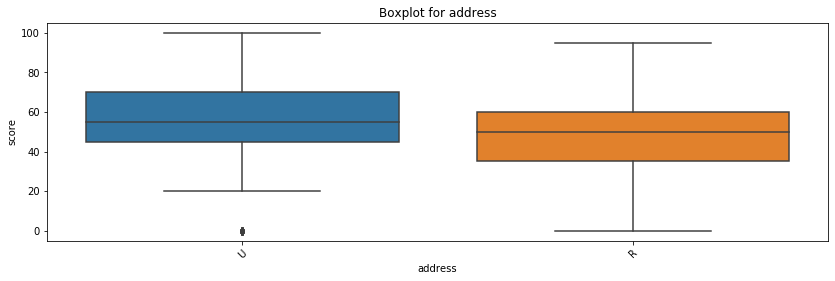

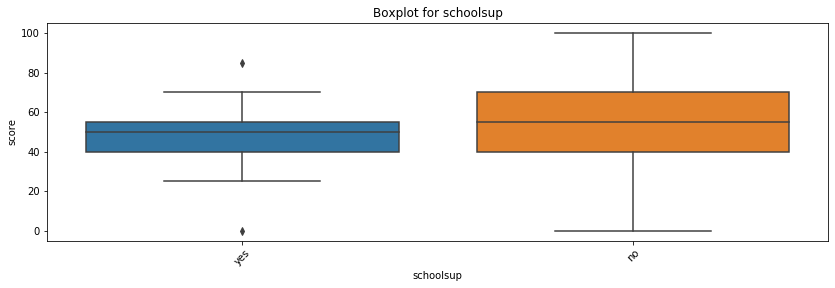

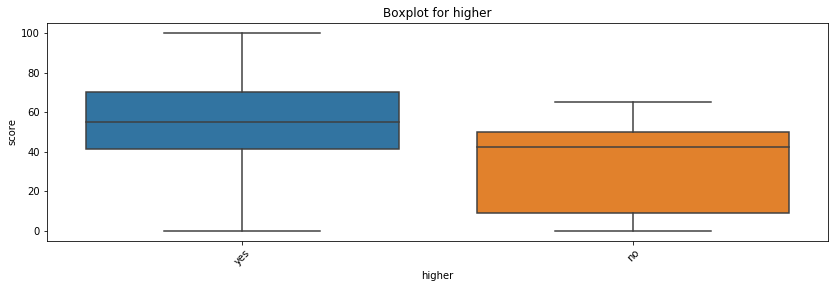

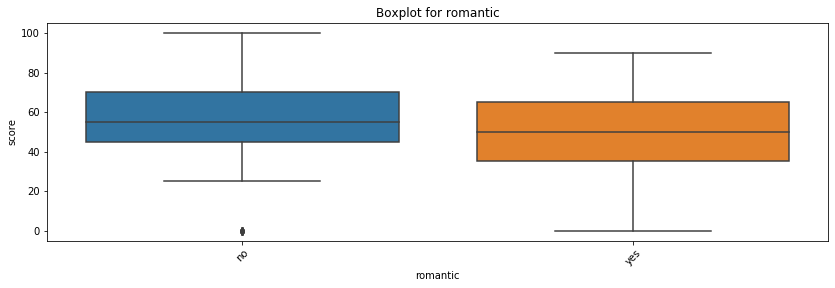

In [37]:
for col in cols:
    get_boxplot(col)

In [38]:
for col in cols:
        get_stat_dif(col)

Найдены статистически значимые различия для колонки score
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [39]:
df_for_model = df

In [40]:
df_for_model.head()

,score,age,Medu,Fedu,studytime,failures,Mjob,Fjob,address,schoolsup,higher,romantic
0,30.0,18,4.0,4.0,2.0,0.0,at_home,teacher,U,yes,yes,no
1,30.0,17,1.0,1.0,2.0,0.0,at_home,other,U,no,yes,no
3,75.0,15,4.0,2.0,3.0,0.0,health,other,U,no,yes,yes
4,50.0,16,3.0,3.0,2.0,0.0,other,other,U,no,yes,no
5,75.0,16,4.0,3.0,2.0,0.0,services,other,U,no,yes,no


Выводы: 

<br> Наиболее важные для результата столбцы ['score', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'Mjob',
<br>  'Fjob', 'address', 'schoolsup', 'higher', 'romantic']
 
<br> Чем лучше образование и место работы учителей, тем лучше score (Medu,Fedu,Mjob,Fjob)
<br> Кто живёт в городе - лучше учится (address)
<br> Также лучше сдают не романтики (romantic), те, кому не 19 лет (age), кто хочет получить Высшее(higher), имеет <br>образовательную поддержку(schoolsup), тратит время на учёбу вне школы (studytime), и имеет мало неудач (failures)



